# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## Odalys Barrionuevo
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### <span style="color:green"> Commento : </span>
<span style="color:green"> Nel seguente esercizio si vuole stimare il valore atteso dell'Hamiltoniana del sistema usando il metodo Monte-Carlo variazionale che sfrutta l'algoritmo di Metropolis per campionare $|\Psi_T^{\sigma,\mu}(x)|^2$ (distribuzione di probabilità invariante) usando una probabilità di transizione uniforme. </span>

<span style="color:green"> L'espressione della derivata seconda della funzione d'onda è: </span>

<span style="color:green"> $$\frac{\partial^2 \Psi_T^{\sigma,\mu}(x)}{\partial x^2} = e^{-\frac{(x-\mu)^2}{2\sigma^2}}\left[\frac{(x-\mu)^2}{\sigma^4}-\frac{1}{\sigma^2}\right]+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}\left[\frac{(x+\mu)^2}{\sigma^4}-\frac{1}{\sigma^4}\right]$$ </span>

<span style="color:green"> Per testare il funzionamento del codice sotto viene mostrata una prima stima del valore atteso dell'hamiltoniana in funzione del numero di blocchi con i seguenti parametri $x_n = 1$, $\mu = 1$, $\sigma = 0.5$ e $\delta = 1$. Così facendo otteniamo una valore dell'energia $E_{\mu, \sigma} \geq E_0$ come ci si aspetta.</span>

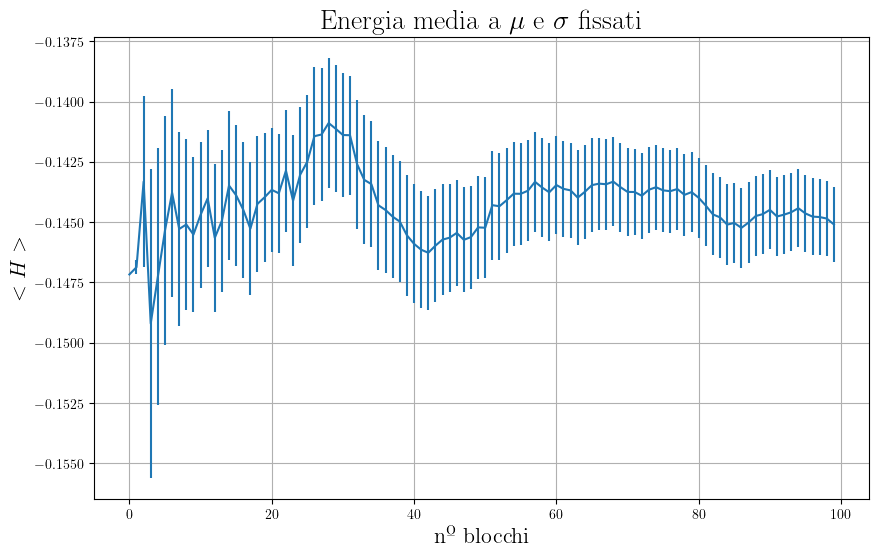

In [172]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

M=1000000             # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]

H = np.loadtxt("Esercizio08.1/Esercizio08.1/H_energy.txt", usecols=(0), unpack='true') 
err_H = np.loadtxt("Esercizio08.1/Esercizio08.1/H_energy.txt", usecols=(1), unpack='true')
plt.figure(figsize=(10,6))
plt.errorbar(x, H, yerr = err_H)
plt.xlabel('nº blocchi', fontsize=16)
plt.ylabel('$<H>$', fontsize=16)
plt.title('Energia media a $\mu$ e $\sigma$ fissati', fontsize=20)
plt.grid(True)
plt.show()

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

### <span style="color:green"> Commento : </span>
<span style="color:green"> Lo scopo del codice ora, iniziato nel primo punto, è quello di trovare i parametri $\mu$ e $\sigma$ che minimizzano l'energia. Per fare ciò è stato sfruttato il metodo del Simulated Annealing che consiste in un processo di $lento^*$  raffreddamento del sistema in modo tale che a temperatura molto bassa si possa pensare di aver raggiunto il minimo dell'energia. </span>

<span style="color:green">$^*$ Se il sistema venisse raffreddato troppo velocemente rischierebbe di non esplorare abbastanza lo spazio delle fasi e quindi di convergere in uno stato metastabile. Per ovviare al problema si deve scegliere una temperatura di partenza che sia abbastanza alta e un passo oppurtuno in modo tale che il sistema sia ergodico.  </span>

<span style="color:green"> Sotto vengono riportate le rappresentazioni di: </span>

<span style="color:green"> 1) Evoluzione dell'energia (con errore) in funzione di $\beta = \frac{1}{k_BT}$ con $k_B = 1$. </span>
<span style="color:green">Si può notare come man mano che la temperatura si abbassa (all'aumentare di $\beta$) l'energia tenda per eccesso al valore dello stato fondamentale.</span>


<span style="color:green"> 2)Traiettoria dell'algoritmo SA nello spazio dei parametri in funzione di $\beta$. Si vede come per temperature alte la traiettoria esplora uno spazio più vasto e più la temperatura si abbassa più la probabilità di esplorare zone lontane è bassa convergendo così verso i veri valori dei parametri che minimizzano l'energia. </span>

<span style="color:green"> 3)Valor medio dell'energia dello stato fondamentale (con errore) in funzione del numero di passi Metropolis quindi energia media che corrisponde alla funzione d'onda descritta dai parametri $\mu$ e $\sigma$ che minimizzano $\langle {\hat H} \rangle_T$ (sfruttando il codice del primo punto). </span>

<span style="color:green"> 4)Istogramma del campionamento di $|\Psi_T(x)|^2$ confrontato con soluzione analitica e matriciale. La distribuzione di probabilità ottenuta si avvicina di più alla soluzione matriciale.</span>


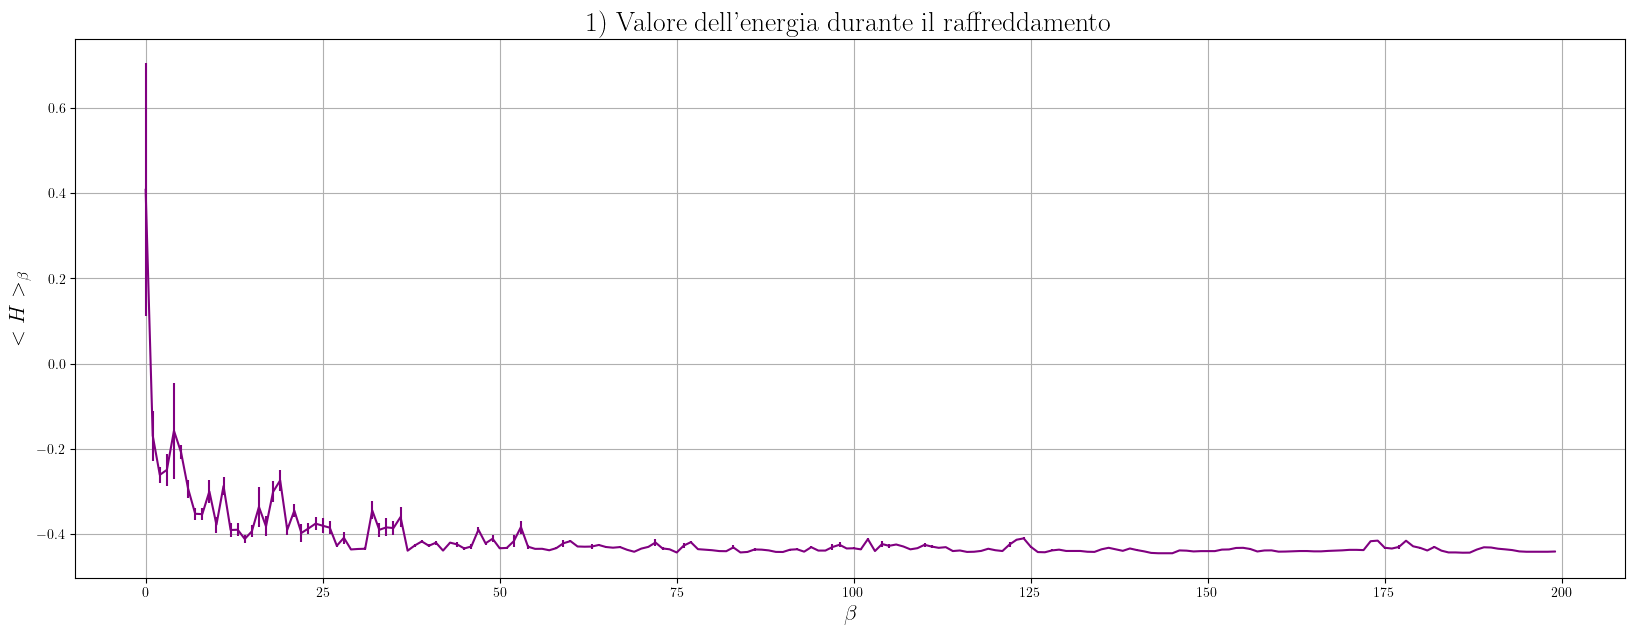

In [223]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

beta = 200
x = np.arange(beta) 

H, err_H = np.loadtxt("Esercizio08.2/Esercizio08.2/Results.txt", usecols=(1, 2), unpack='true') 
plt.figure(figsize=(20,7))
plt.errorbar(x, H, yerr = err_H, color = 'purple')
plt.xlabel('$\\beta$', fontsize=16)
plt.ylabel('$<H>_{\\beta}$', fontsize=16)
plt.title(" 1) Valore dell'energia durante il raffreddamento", fontsize=20)
plt.grid(True)
plt.show()

Valori di mu e sigma sono rispettivamente: 
0.8018046198 0.607285428


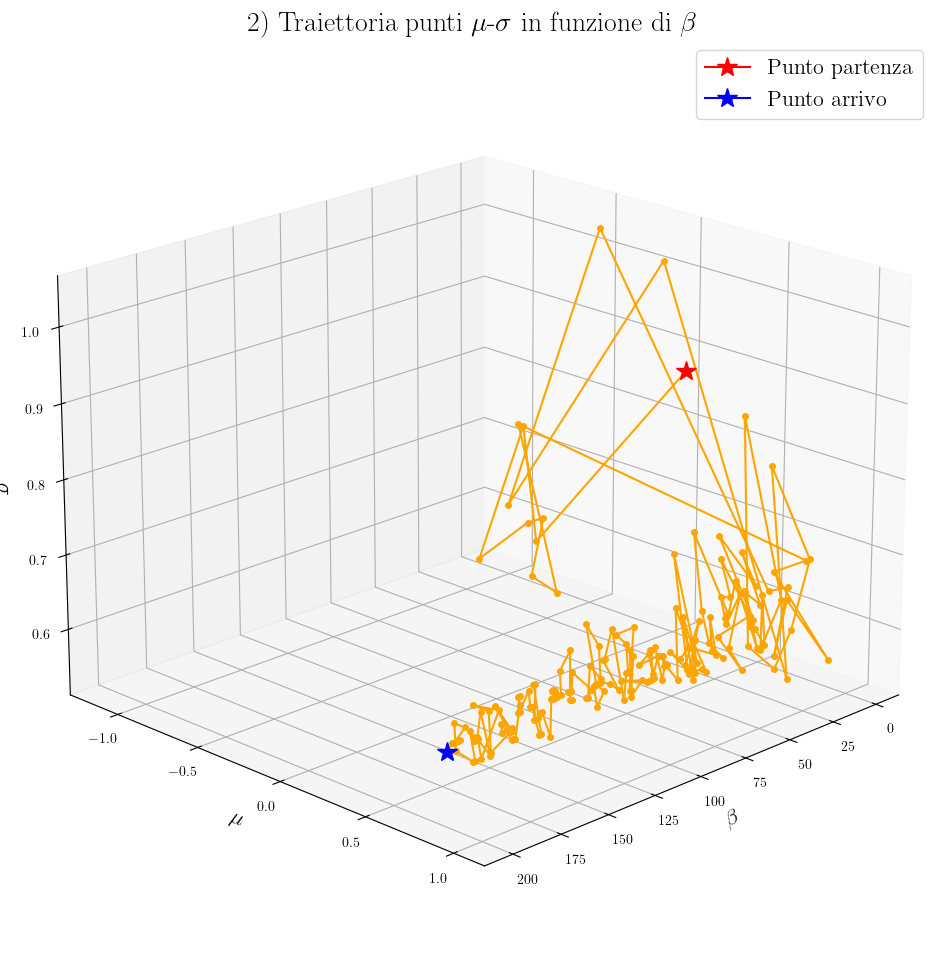

In [218]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

beta, mu, sigma = np.loadtxt("Esercizio08.2/Esercizio08.2/Results.txt", usecols=(0,3,4), unpack='true')

plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot3D(beta,mu,sigma, marker='o', markersize=4, color='orange')
ax.plot3D(1, mu[0], sigma[0], marker='*', markersize=15, label='Punto partenza', color='r')
ax.plot3D(200, mu[199], sigma[199], marker='*', markersize=15, label='Punto arrivo', color='b')
ax.set_xlabel('$\\beta$', fontsize=16)
ax.set_ylabel('$\mu$', fontsize=16)
ax.set_zlabel('$\sigma$', fontsize=16)
plt.title('2) Traiettoria punti $\mu$-$\sigma$ in funzione di $\\beta$', fontsize=20)
plt.legend(fontsize=16)
ax.view_init(20, 45)
print('Valori di mu e sigma sono rispettivamente: ')
print(mu[199], sigma[199])

plt.show()

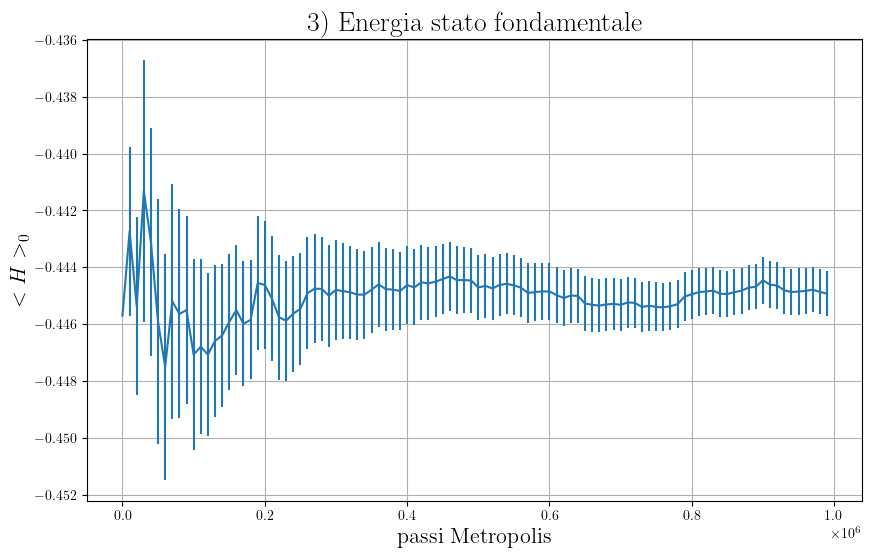

In [249]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M=1000000             # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]
    
x = x*L # Number of throws = block * (Number of throws in each block)
H = np.loadtxt("Esercizio08.1/Esercizio08.1/H_energy_0.txt", usecols=(0), unpack='true') 
err_H = np.loadtxt("Esercizio08.1/Esercizio08.1/H_energy_0.txt", usecols=(1), unpack='true')
plt.figure(figsize=(10,6))
plt.errorbar(x, H, yerr = err_H)
plt.xlabel('passi Metropolis', fontsize=16)
plt.ylabel('$<H>_{0}$', fontsize=16)
plt.title('3) Energia stato fondamentale', fontsize=20)
plt.grid(True)
plt.show()

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

Ground state energy:  -0.46046587969271563
1st excited state energy:  0.09742471331760941
2nd excited state energy:  1.9717331343930213


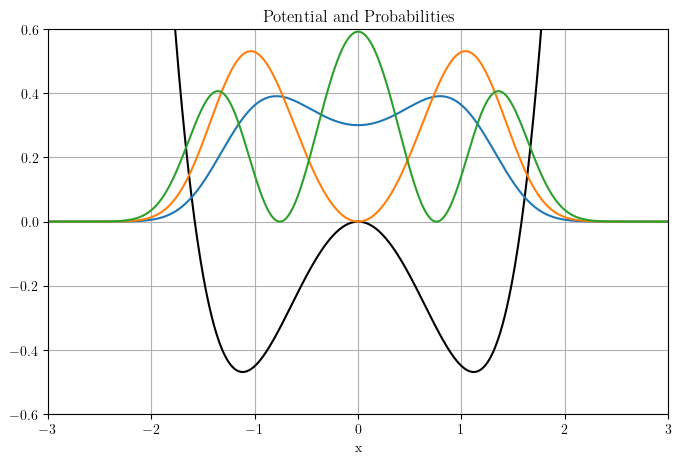

In [233]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential and Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

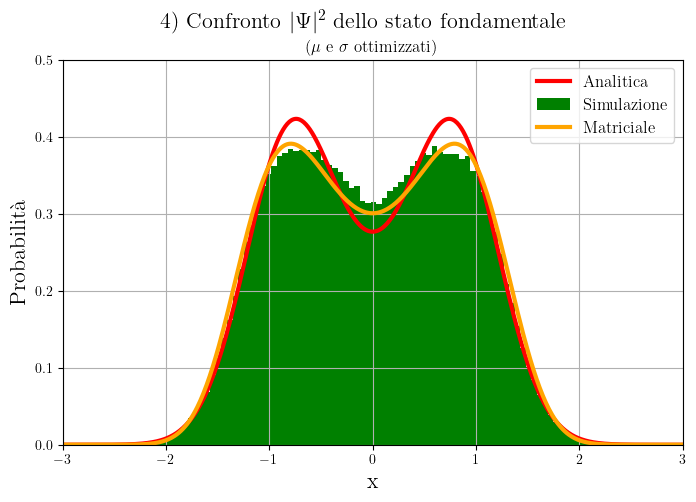

In [253]:
import scipy.integrate as integrate

def Psi2 (x,mu,sigma):
    return (np.exp(-(x-mu)**2/(2*sigma**2))+np.exp(-(x+mu)**2/(2*sigma**2)))**2
x=np.linspace(-5,5,1000)  
mu=0.801805
sigma=0.607285
plt.figure(figsize=(8,5))
#calcolo integrale di Psi2 nell'intervallo (-5, 5) e aggiungo i parametri mu e sigma
norma = integrate.quad(Psi2, -5, 5, args=(mu, sigma))
plt.plot(x,Psi2(x,mu,sigma)/norma[0], linewidth=3, color='r', label='Analitica') #Psi2 normalizzato
pos=np.loadtxt("Esercizio08.1/Esercizio08.1/x_0.txt")
plt.hist(pos,100, density="true", color = 'green', label='Simulazione')
plt.plot(x,psi[0]**2, color='orange', linewidth=3, label='Matriciale')
plt.xlabel('x', fontsize=16)
plt.xlim(-3,3)
plt.ylabel('Probabilità', fontsize=16)
plt.ylim(0,0.5)
plt.title('($\mu$ e $\sigma$ ottimizzati)', fontsize=12)
plt.suptitle('4) Confronto $|\Psi|^2$ dello stato fondamentale', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()